<a href="https://colab.research.google.com/github/Prerna99-star/Support-Vector-Machine/blob/master/Grid_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values
print(dataset)
print(X)
print(Y)

      User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]
[[1.90e+01 1.90e+04]
 [3.50e+01 2.00e+04]
 [2.60e+01 4.30e+04]
 [2.70e+01 5.70e+04]
 [1.90e+01 7.60e+04]
 [2.70e+01 5.80e+04]
 [2.70e+01 8.40e+04]
 [3.20e+01 1.50e+05]
 [2.50e+01 3.30e+04]
 [3.50e+01 6.50e+04]
 [2.60e+01 8.00e+04]
 [2.60e+01 5.20e+04]
 [2.00e+01 8.60e+04]
 [3.20e+01 1.80e+04]
 [1.80e+01

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [4]:
from sklearn.preprocessing import StandardScaler
Sc_X = StandardScaler() 
X_train = Sc_X.fit_transform(X_train)
X_test = Sc_X.transform(X_test)
print(X_train)
print(X_test)

[[-0.83846229  0.34672812]
 [-0.25976899 -0.71830706]
 [ 0.22247542 -0.24495809]
 [ 0.60827096 -0.86622862]
 [ 0.89761761 -0.57038551]
 [ 0.31892431 -0.51121689]
 [-0.25976899  0.11005364]
 [-0.93491118  1.61885348]
 [ 1.09051538  0.52423399]
 [-0.16332011 -0.24495809]
 [ 0.89761761 -0.74789137]
 [ 0.70471984 -1.3691619 ]
 [ 0.41537319  0.64257123]
 [-0.16332011 -0.15620516]
 [ 0.31892431  0.34672812]
 [ 0.41537319 -0.45204827]
 [ 0.41537319  0.13963795]
 [-1.12780894 -1.57625207]
 [-0.74201341  1.97386521]
 [ 1.47631091  0.40589674]
 [ 0.02957766  0.08046933]
 [-1.70650224  0.16922226]
 [-0.74201341 -0.57038551]
 [ 0.02957766 -0.21537378]
 [-0.25976899 -1.3691619 ]
 [-1.12780894 -0.48163258]
 [-0.25976899 -0.39287965]
 [ 1.09051538 -1.19165604]
 [ 0.80116873  1.44134762]
 [ 1.95855533  0.96799865]
 [ 0.89761761 -0.5408012 ]
 [ 2.15145309  0.43548105]
 [-1.12780894  0.34672812]
 [ 1.86210644  1.58926917]
 [-0.06687123 -1.04373448]
 [-0.64556453 -1.48749914]
 [-0.25976899 -0.24495809]
 

In [5]:
#Fitting Classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [6]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1]


In [7]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[57  4]
 [ 5 34]]


In [0]:
# Applying K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()
accuracies.std()

In [11]:
# Applying grid Search
from sklearn.model_selection import GridSearchCV
parameters = [
              {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, 
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.5, 0.1, 0.01, 0.001]}
]
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_
print(best_accuracy)
print(best_params)

0.9100000000000001
{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


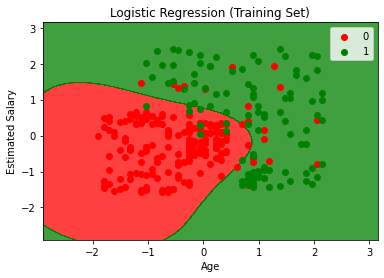

In [13]:
# visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid( np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
        np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


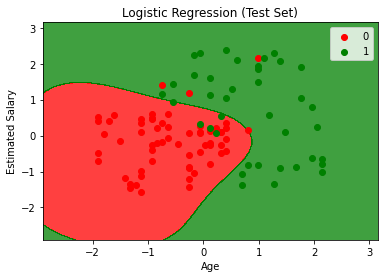

In [12]:
# visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid( np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01),
        np.arange(start = X_set[:, 0].min()-1, stop = X_set[:, 0].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
